In [90]:
mustInstall <- FALSE; if(mustInstall){
    install.packages(c("bibliometrix", "citecorp")) # "openalexR" in CRAN/cloud R might be much older than github.
    # detach("package:openalexR", unload=TRUE)
    install.packages("remotes")
    remotes::install_github("massimoaria/openalexR")
}

In [91]:
require(bibliometrix)
require(citecorp)
require(openalexR)
require(dplyr)

In [95]:
c.emailID <- "yadevinit@gmail.com"; c.verbose <- TRUE
c.country <- "IN" # "IN" for India.
c.fromPub <- "2018-01-01"; c.toPub <- "2020-12-31" # or is it by financial year eg Apr--Mar?
c.decimal <- 3
oaApiRequest.my <- function(..., mailto=c.emailID, verbose=c.verbose){ # be Polite as suggested.
    return(oaApiRequest(..., mailto=mailto, verbose=verbose))
}
oa_fetch.my <- function(..., mailto=c.emailID, verbose=c.verbose){ # be Polite as suggested.
    return(oa_fetch(..., mailto=mailto, verbose=verbose))
}
filterInstitutions <- function(type=c("education", "facility")[1]){
    chosen_insts <- list(
        entity = "institutions",
        country_code = c.country,
        type = type,
        # error: [<from_publication_date is not a valid field ...] maybe coz entity="institutions", not "works".
        # from_publication_date = c.fromPub,
        # to_publication_date = c.toPub,
        verbose = TRUE
    )
    return(chosen_insts)
}

In [96]:
# biblioshiny()

In [97]:
# was ref https://cran.r-project.org/web/packages/openalexR/vignettes/A_Brief_Introduction_to_openalexR.html
# now ref https://github.com/massimoaria/openalexR
date()
res1ty <- "education"; chosen_insts <- filterInstitutions(type=res1ty)
res1ct <- do.call(oa_fetch.my, c(chosen_insts, list(count_only = TRUE)))
dplyr::glimpse(res1ct)

[1] "Wed Aug 31 21:43:02 2022"

[1] "https://api.openalex.org/institutions?filter=country_code%3AIN%2Ctype%3Aeducation"


Requesting url: https://api.openalex.org/institutions?filter=country_code%3AIN%2Ctype%3Aeducation



 Named int [1:4] 1141 20 1 1
 - attr(*, "names")= chr [1:4] "count" "db_response_time_ms" "page" "per_page"


In [98]:
res1wk <- do.call(oa_fetch.my, chosen_insts)
dplyr::glimpse(res1wk)
# oa_fetch(): composes three functions above so the user can execute everything in one step, i.e.,
# oa_query |> oa_request |> oa2df

[1] "https://api.openalex.org/institutions?filter=country_code%3AIN%2Ctype%3Aeducation"


Requesting url: https://api.openalex.org/institutions?filter=country_code%3AIN%2Ctype%3Aeducation

About to get a total of 6 pages of results with a total of 1141 records.


  OpenAlex downloading [======>--------------]  33% eta:  1m

  OpenAlex downloading [=========>-----------]  50% eta:  1m

  OpenAlex downloading [=============>-------]  67% eta:  2m

  OpenAlex downloading [=================>---]  83% eta: 42s

  OpenAlex downloading [=====================] 100% eta:  0s



  converting [-------------------------------]   0% eta:  3m

  converting [-------------------------------]   0% eta:  2m

  converting [-------------------------------]   1% eta:  1m

  converting [-------------------------------]   1% eta: 49s

  converting [-------------------------------]   2% eta: 47s

  converting [>------------------------------]   2% eta: 48s

  converting [>------------------------------]   2% eta: 47s

  converting [>------------------------------]   2% eta: 48s

  converting [>---


  converting [================>--------------]  55% eta: 10s

  converting [================>--------------]  56% eta: 10s

  converting [=================>-------------]  57% eta: 10s

  converting [=================>-------------]  58% eta: 10s

  converting [=================>-------------]  58% eta:  9s

  converting [=================>-------------]  59% eta:  9s

  converting [=================>-------------]  60% eta:  9s

  converting [==================>------------]  60% eta:  9s

  converting [==================>------------]  61% eta:  9s

  converting [==================>------------]  62% eta:  9s

  converting [==================>------------]  62% eta:  8s

  converting [==================>------------]  63% eta:  8s

  converting [===================>-----------]  63% eta:  8s

  converting [===================>-----------]  64% eta:  8s

  converting [===================>-----------]  65% eta:  8s

  converting [===================>-----------]  66% eta:  8s

  conve

Rows: 1,141
Columns: 19
$ id                 <chr> "https://openalex.org/I59270414", "https://openalex~
$ name               <chr> "Indian Institute of Science Bangalore", "All India~
$ name_alternatives  <list> NA, "AIIMS Delhi", "IIT Kharagpur", "IIT Bombay", ~
$ name_acronyms      <list> "IISc", NA, "IIT KGP", "IITB", "IITD", NA, "BHU", ~
$ name_international <list> [<data.frame[1 x 50]>], [<data.frame[1 x 28]>], [<~
$ ror                <chr> "https://ror.org/04dese585", "https://ror.org/02dwc~
$ ids                <list> [<tbl_df[6 x 2]>], [<tbl_df[6 x 2]>], [<tbl_df[6 x~
$ country            <chr> "IN", "IN", "IN", "IN", "IN", "IN", "IN", "IN", "IN~
$ geo                <list> [<data.frame[1 x 7]>], [<data.frame[1 x 7]>], [<da~
$ type               <chr> "education", "education", "education", "education",~
$ homepage           <chr> "http://www.iisc.ernet.in/", "http://www.aiims.edu/~
$ image              <chr> "https://upload.wikimedia.org/wikipedia/en/3/3b/Ind~
$ thumbnail     

In [99]:
fPrefix <- res1ty
saveRDS(res1wk, file=paste0(fPrefix, ".rds"))
# "id","name","name_alternatives","name_acronyms","name_international","ror","ids","country","geo","type","homepage","image","thumbnail","associated_inst","works_count","TC","TCperYear","concept","works_api_url"
colnames.nonVector <- c("name_alternatives","name_acronyms","name_international","ids","geo",
                        "associated_inst","TCperYear","concept")
res1.tmp <- res1wk[, setdiff(colnames(res1wk), colnames.nonVector)]
write.csv(res1.tmp, file=paste0(fPrefix, ".csv"), row.names=FALSE)

In [100]:
res2ty <- "facility"; chosen_insts <- filterInstitutions(type=res2ty)
res2ct <- do.call(oa_fetch.my, c(chosen_insts, list(count_only = TRUE)))
glimpse(res2ct)

[1] "https://api.openalex.org/institutions?filter=country_code%3AIN%2Ctype%3Afacility"


Requesting url: https://api.openalex.org/institutions?filter=country_code%3AIN%2Ctype%3Afacility



 Named int [1:4] 378 2 1 1
 - attr(*, "names")= chr [1:4] "count" "db_response_time_ms" "page" "per_page"


In [101]:
res2wk <- do.call(oa_fetch.my, chosen_insts)
dplyr::glimpse(res2wk)

[1] "https://api.openalex.org/institutions?filter=country_code%3AIN%2Ctype%3Afacility"


Requesting url: https://api.openalex.org/institutions?filter=country_code%3AIN%2Ctype%3Afacility

About to get a total of 2 pages of results with a total of 378 records.


  OpenAlex downloading [=====================] 100% eta:  0s



  converting [=>-----------------------------]   5% eta:  4s

  converting [=>-----------------------------]   6% eta:  4s

  converting [=>-----------------------------]   6% eta:  5s

  converting [=>-----------------------------]   7% eta:  5s

  converting [=>-----------------------------]   8% eta:  5s

  converting [==>----------------------------]   8% eta:  5s

  converting [==>----------------------------]   9% eta:  5s

  converting [==>----------------------------]  10% eta:  5s

  converting [==>----------------------------]  11% eta:  5s

  converting [===>---------------------------]  11% eta:  5s

  converting [===>---------------------------]  12% eta:  5s

  converting [===>---------------------------]  13% eta:  5s

  converting [===>--

Rows: 378
Columns: 19
$ id                 <chr> "https://openalex.org/I24676775", "https://openalex~
$ name               <chr> "Indian Institute of Technology Madras", "Bhabha At~
$ name_alternatives  <list> "IIT Madras", "Bhabha Paramanu Anusandhan Kendra",~
$ name_acronyms      <list> "IITM", "BARC", "IICT", "NCL", <"IARI", "ARI">, "S~
$ name_international <list> [<data.frame[1 x 35]>], [<data.frame[1 x 19]>], [<~
$ ror                <chr> "https://ror.org/03v0r5n49", "https://ror.org/05w6w~
$ ids                <list> [<tbl_df[6 x 2]>], [<tbl_df[6 x 2]>], [<tbl_df[6 x~
$ country            <chr> "IN", "IN", "IN", "IN", "IN", "IN", "IN", "IN", "IN~
$ geo                <list> [<data.frame[1 x 7]>], [<data.frame[1 x 7]>], [<da~
$ type               <chr> "facility", "facility", "facility", "facility", "fa~
$ homepage           <chr> "https://www.iitm.ac.in/", "http://www.barc.gov.in/~
$ image              <chr> "https://upload.wikimedia.org/wikipedia/en/6/69/IIT~
$ thumbnail       

In [102]:
# res2ty <- "facility"; res2wk <- res2fac
# IIT Madras and Palakkad. An IISER. An Institute of Chemical Technology.
fPrefix <- res2ty
saveRDS(res2wk, file=paste0(fPrefix, ".rds"))
# "id","name","name_alternatives","name_acronyms","name_international","ror","ids","country","geo","type","homepage","image","thumbnail","associated_inst","works_count","TC","TCperYear","concept","works_api_url"
res2.tmp <- res2wk[, setdiff(colnames(res2wk), colnames.nonVector)]
write.csv(res2.tmp, file=paste0(fPrefix, ".csv"), row.names=FALSE)

In [186]:
aggYworksTC.inst <- function(inst.TCperYear, endYear, lagYears, aggYears){
    includeYr <- inst.TCperYear$year %in% ((endYear - lagYears - (aggYears - 1)) : (endYear - lagYears))
    # ans <- c(works_countAgg=sum(inst.TCperYear$works_count[includeYr]),
    #          TCagg=sum(inst.TCperYear$TC[includeYr]))
    ans <- setNames(c(sum(inst.TCperYear$works_count[includeYr]), sum(inst.TCperYear$TC[includeYr])),
                    paste0(c("works_count", "TC"), endYear)
                   )
    return(ans)
}
appendNIRFworksTC <- function(res, endYear=2022, lagYears=2, aggYears=3){
    # ans <- lapply(1:nrow(res), FUN=function(i) getNIRFworksTC.inst(res$TCperYear[[i]], year), res=res)
    ans <- sapply(res$TCperYear, FUN=aggYworksTC.inst, endYear=endYear, lagYears=lagYears, aggYears=aggYears)
    ans <- t(ans)
    # res.ans <- cbind(res, works_countAgg=ans[,1], TCagg=ans[,2])
    res.ans <- cbind(res, ans[,1], ans[,2])
    colnames(res.ans) <- c(colnames(res), colnames(ans))
    return(res.ans)
}

In [187]:
res12wk.bak <- res12wk <- rbind(res1wk, res2wk)
aggYworksTC.inst(res12wk$TCperYear[[1]], endYear=2021, lagYears=2, aggYears=3) # test example for 2021.
aggYworksTC.inst(res12wk$TCperYear[[1]], endYear=2022, lagYears=2, aggYears=3) # test example for 2022.
# stop()
res12wk <- appendNIRFworksTC(res12wk, endYear=2021)
res12wk <- appendNIRFworksTC(res12wk, endYear=2022)
# as.data.frame(cbind(res12wk), row.names=res$name)
glimpse(res12wk)
res12wk <- cbind(res12wk,
                 TCperWork2021=round(res12wk$TC2021 / res12wk$works_count2021, c.decimal),
                 TCperWork2022=round(res12wk$TC2022 / res12wk$works_count2022, c.decimal),
                 TCperWork=round(res12wk$TC / res12wk$works_count, c.decimal)
                )
glimpse(res12wk)

works_count2021          TC2021 
           9210          502866

works_count2022          TC2022 
           9803          557272

Rows: 1,519
Columns: 23
$ id                 <chr> "https://openalex.org/I59270414", "https://openalex~
$ name               <chr> "Indian Institute of Science Bangalore", "All India~
$ name_alternatives  <list> NA, "AIIMS Delhi", "IIT Kharagpur", "IIT Bombay", ~
$ name_acronyms      <list> "IISc", NA, "IIT KGP", "IITB", "IITD", NA, "BHU", ~
$ name_international <list> [<data.frame[1 x 50]>], [<data.frame[1 x 28]>], [<~
$ ror                <chr> "https://ror.org/04dese585", "https://ror.org/02dwc~
$ ids                <list> [<tbl_df[6 x 2]>], [<tbl_df[6 x 2]>], [<tbl_df[6 x~
$ country            <chr> "IN", "IN", "IN", "IN", "IN", "IN", "IN", "IN", "IN~
$ geo                <list> [<data.frame[1 x 7]>], [<data.frame[1 x 7]>], [<da~
$ type               <chr> "education", "education", "education", "education",~
$ homepage           <chr> "http://www.iisc.ernet.in/", "http://www.aiims.edu/~
$ image              <chr> "https://upload.wikimedia.org/wikipedia/en/3/3b/Ind~
$ thumbnail     

In [188]:
fPrefix <- paste0(res1ty, res2ty)
saveRDS(res12wk, file=paste0(fPrefix, ".rds"))

# res12.tmp <- rbind(res1.tmp, res2.tmp)
res12.tmp <- res12wk[, setdiff(colnames(res12wk), colnames.nonVector)]
# res12.tmp <- cbind(res12.tmp, TCperWork=round(res12.tmp$TC / res12.tmp$works_count, c.decimal),
#                   TCperWorkAggYears=round(res12.tmp$TCagg / res12.tmp$works_countAgg, c.decimal))
write.csv(res12.tmp, file=paste0(fPrefix, ".csv"), row.names=FALSE)
glimpse(res12.tmp)

Rows: 1,519
Columns: 18
$ id              <chr> "https://openalex.org/I59270414", "https://openalex.or~
$ name            <chr> "Indian Institute of Science Bangalore", "All India In~
$ ror             <chr> "https://ror.org/04dese585", "https://ror.org/02dwcqs7~
$ country         <chr> "IN", "IN", "IN", "IN", "IN", "IN", "IN", "IN", "IN", ~
$ type            <chr> "education", "education", "education", "education", "e~
$ homepage        <chr> "http://www.iisc.ernet.in/", "http://www.aiims.edu/en.~
$ image           <chr> "https://upload.wikimedia.org/wikipedia/en/3/3b/Indian~
$ thumbnail       <chr> "https://upload.wikimedia.org/wikipedia/en/thumb/3/3b/~
$ works_count     <int> 61306, 48774, 43503, 40497, 37486, 37099, 32957, 31091~
$ TC              <int> 2317599, 1669543, 1606946, 1335076, 1234079, 1630797, ~
$ works_api_url   <chr> "https://api.openalex.org/works?filter=institutions.id~
$ works_count2021 <int> 9210, 8612, 8308, 8423, 7355, 5395, 4812, 5312, 6254, ~
$ TC2021        

education  facility 
    492.0     362.5 
education  facility 
     4418      7230 


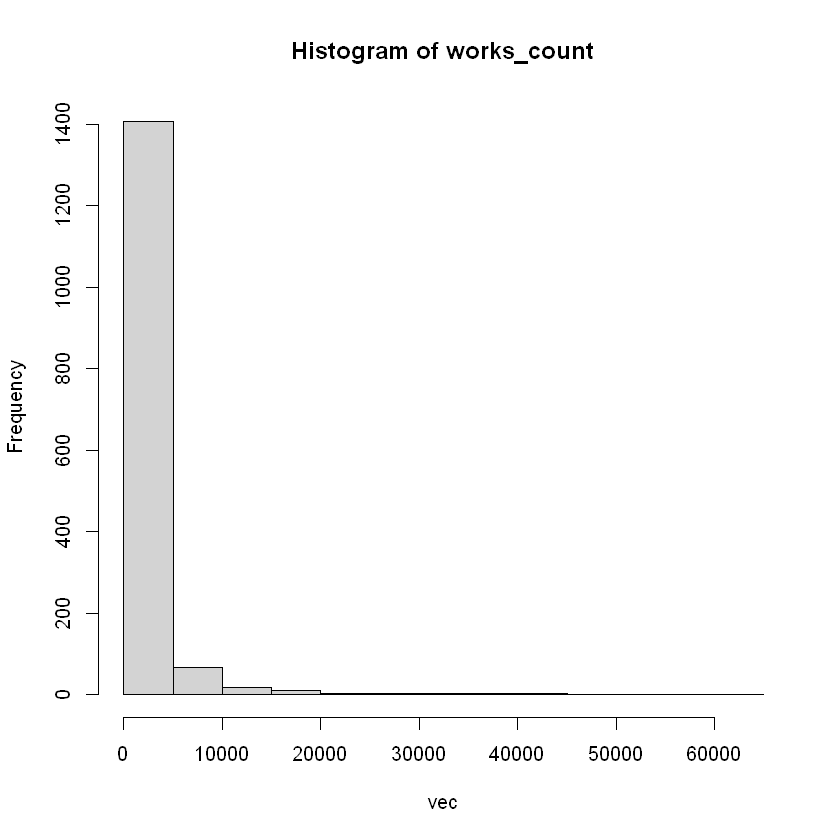

education  facility 
    9.298    24.595 


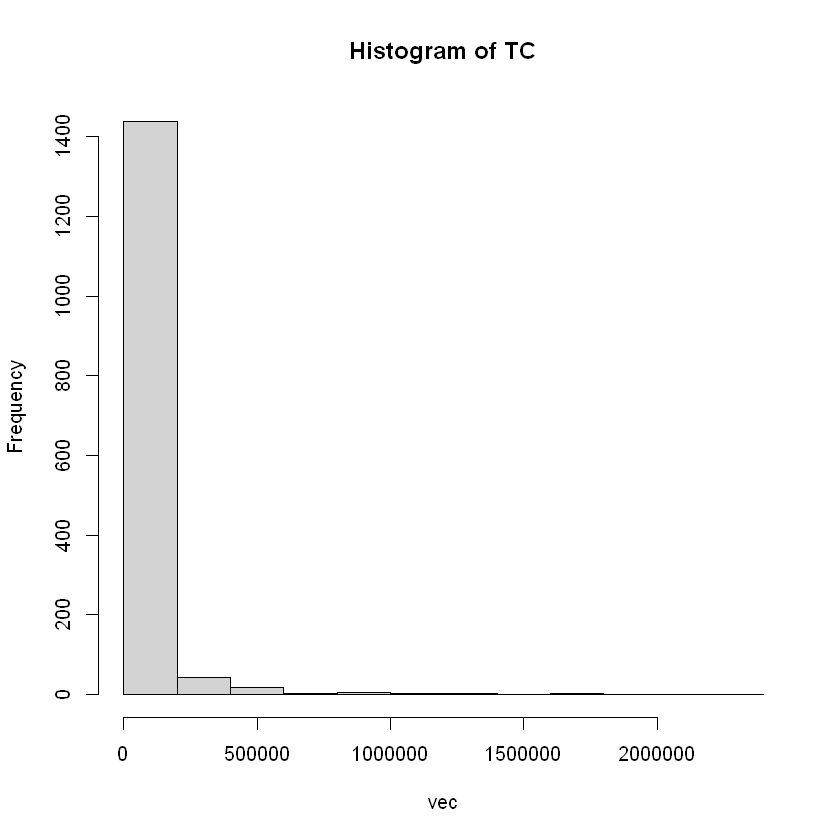

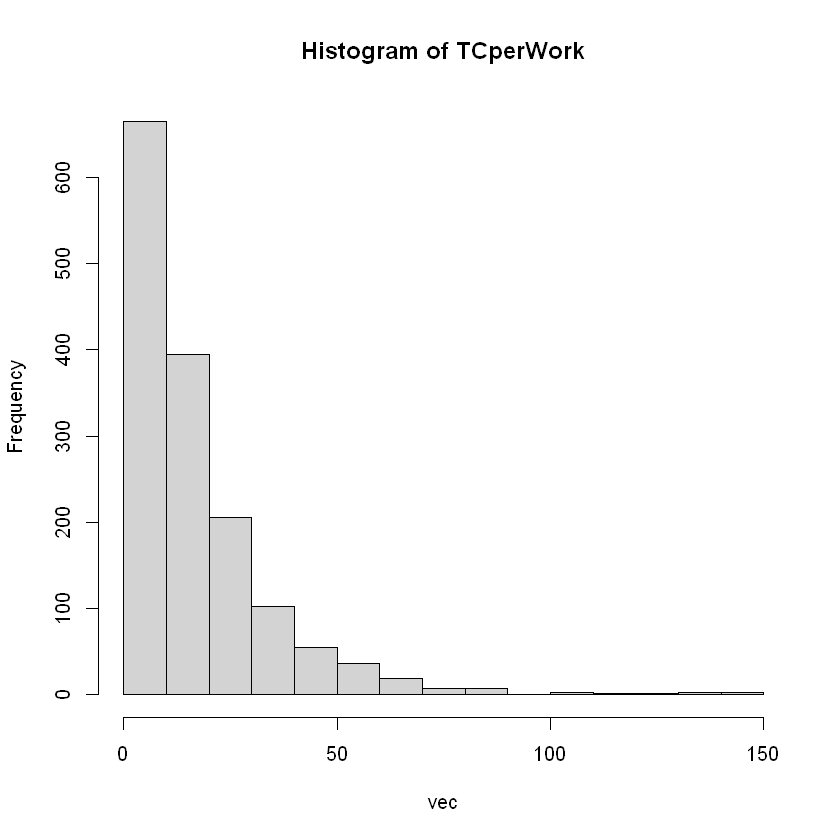

In [189]:
for(fld in c("works_count", "TC", "TCperWork")){
    vec <- res12.tmp[[fld]] # res12.tmp$works_count
    print(tapply(vec, res12.tmp$type, FUN=function(x) median(x, na.rm=TRUE)))
    hist(vec, main=paste0("Histogram of ", fld))
}
# Typically, a "facility" associates with fewer "works_count" and more TC compared to "education".

In [190]:
head(res12.tmp[order(res12.tmp$works_count, decreasing=TRUE), "name"], 30)

[1] "Indian Institute of Science Bangalore"                    
 [2] "All India Institute of Medical Sciences"                  
 [3] "Indian Institute of Technology Kharagpur"                 
 [4] "Indian Institute of Technology Madras"                    
 [5] "Indian Institute of Technology Bombay"                    
 [6] "Indian Institute of Technology Delhi"                     
 [7] "University of Delhi"                                      
 [8] "Bhabha Atomic Research Centre"                            
 [9] "Banaras Hindu University"                                 
[10] "Indian Institute of Technology Kanpur"                    
[11] "Post Graduate Institute of Medical Education and Research"
[12] "Jadavpur University"                                      
[13] "Indian Institute of Technology Roorkee"                   
[14] "Vellore Institute of Technology University"               
[15] "University of Calcutta"                                   
[16] "Indian Institute of Technology Indore"                    
[17] "Tata Institute of Fundamental Research"                   
[18] "Panjab University"                                        
[19] "Aligarh Muslim University"                                
[20] "Anna University, Chennai"                                 
[21] "Indian Institute of Technology Guwahati"                  
[22] "University of Rajasthan"                                  
[23] "Jawaharlal Nehru University"                              
[24] "Indian Statistical Institute"                             
[25] "Indian Institute of Chemical Technology"                  
[26] "National Chemical Laboratory"                             
[27] "University of Hyderabad"                                  
[28] "Amrita Vishwa Vidyapeetham University"                    
[29] "Annamalai University"                                     
[30] "National Institute of Technology Rourkela"

In [191]:
head(res12.tmp[order(res12.tmp$TC, decreasing=TRUE), "name"], 30)

[1] "Indian Institute of Science Bangalore"                    
 [2] "Tata Institute of Fundamental Research"                   
 [3] "Bhabha Atomic Research Centre"                            
 [4] "All India Institute of Medical Sciences"                  
 [5] "University of Delhi"                                      
 [6] "Indian Institute of Technology Kharagpur"                 
 [7] "Panjab University"                                        
 [8] "Indian Institute of Technology Bombay"                    
 [9] "Banaras Hindu University"                                 
[10] "Indian Institute of Technology Delhi"                     
[11] "Indian Institute of Technology Madras"                    
[12] "Indian Institute of Technology Kanpur"                    
[13] "National Chemical Laboratory"                             
[14] "Indian Institute of Chemical Technology"                  
[15] "Indian Institute of Technology Roorkee"                   
[16] "Post Graduate Institute of Medical Education and Research"
[17] "Jadavpur University"                                      
[18] "Saha Institute of Nuclear Physics"                        
[19] "Aligarh Muslim University"                                
[20] "Indian Institute of Technology Guwahati"                  
[21] "Institute of Chemical Technology"                         
[22] "Anna University, Chennai"                                 
[23] "Indian Association for the Cultivation of Science"        
[24] "University of Calcutta"                                   
[25] "Indian Institute of Technology Indore"                    
[26] "University of Hyderabad"                                  
[27] "Vellore Institute of Technology University"               
[28] "Jawaharlal Nehru Centre for Advanced Scientific Research" 
[29] "University of Madras"                                     
[30] "Indian Agricultural Research Institute"

In [192]:
head(res12.tmp[order(res12.tmp$TCperWork, decreasing=TRUE) & (res12.tmp$type == "education"), "name"], 30)

[1] "Indian Institute of Science Bangalore"                    
 [2] "All India Institute of Medical Sciences"                  
 [3] "Indian Institute of Technology Kharagpur"                 
 [4] "Indian Institute of Technology Bombay"                    
 [5] "Indian Institute of Technology Delhi"                     
 [6] "University of Delhi"                                      
 [7] "Banaras Hindu University"                                 
 [8] "Indian Institute of Technology Kanpur"                    
 [9] "Post Graduate Institute of Medical Education and Research"
[10] "Jadavpur University"                                      
[11] "Indian Institute of Technology Roorkee"                   
[12] "Vellore Institute of Technology University"               
[13] "University of Calcutta"                                   
[14] "Indian Institute of Technology Indore"                    
[15] "Tata Institute of Fundamental Research"                   
[16] "Panjab University"                                        
[17] "Aligarh Muslim University"                                
[18] "Anna University, Chennai"                                 
[19] "Indian Institute of Technology Guwahati"                  
[20] "University of Rajasthan"                                  
[21] "Jawaharlal Nehru University"                              
[22] "Indian Statistical Institute"                             
[23] "University of Hyderabad"                                  
[24] "Amrita Vishwa Vidyapeetham University"                    
[25] "Annamalai University"                                     
[26] "National Institute of Technology Rourkela"                
[27] "Birla Institute of Technology and Science, Pilani"        
[28] "University of Madras"                                     
[29] "Academy of Scientific and Innovative Research"            
[30] "SRM Institute of Science and Technology"

In [171]:
# NIRF considers 3 years data up to 2 years prior to ranking year eg NIRF2022 uses 2018-2020 data. Also:
# Also [Quality of Publications QP] considers:
# [CC/Frq where CC is Total Citation Count over previous three years]
# [Frq is maximum of nominal number of faculty members ... 1:15 or the available faculty]
# [P is weighted number of publications]
# [(TOP25P/P) where TOP25P: Number of citations in top 25 percentile averaged over the previous three years]

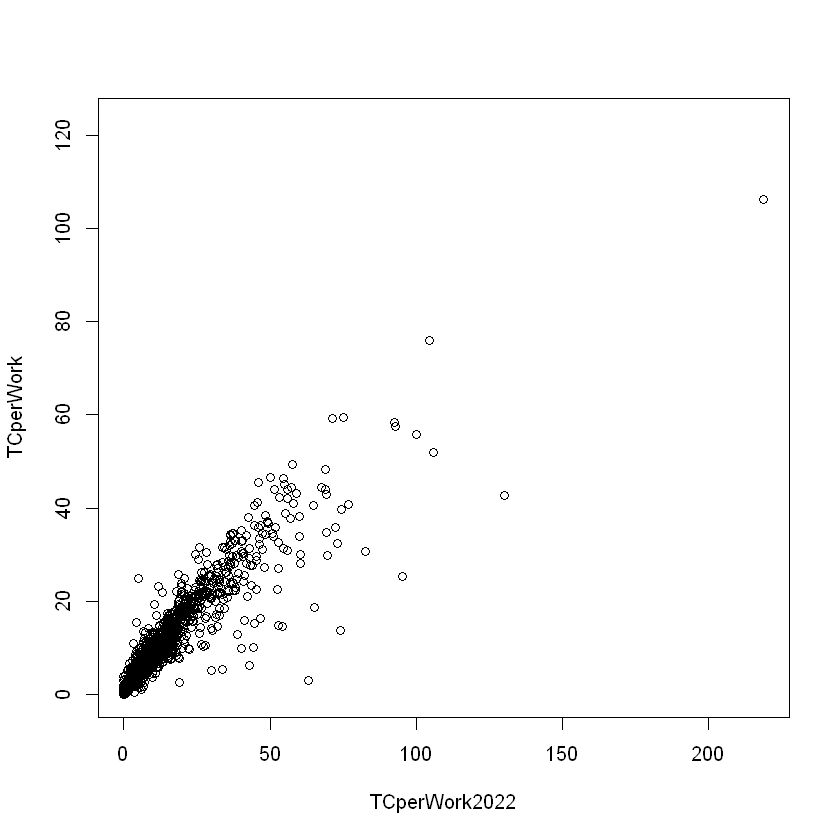

In [195]:
plot(TCperWork ~ TCperWork2022, data=res12wk[(res12wk$type %in% c(res1ty, res2ty)[1]),])

In [196]:
tapply(res12wk$works_count2022, res12wk$type, FUN=sum) # NIRF2022 for Engineering reports about 200k works.

education  facility 
   525434     79366

In [109]:
# res2wk.bibdf <- oa2bibliometrix(res2wk)
# glimpse(res2wk.bibdf)
# warning: oa2bibliometrix accepts only OpenAlex data frames containing 'works' (entity = 'works')

In [6]:
stop()
filter.my <- paste0("country_code:", c.country, ",type:education")
query_inst <- oa_query( # was oaQueryBuild()
  entity = "institutions",
  filter = filter.my)
# We check how many records match the query:

res <- oa_request.my(query_url = query_inst, # was oaApiRequest()
                    total.count = TRUE,
                    verbose=TRUE)

Requesting url: https://api.openalex.org/institutions?filter=country_code%3AINtype%3Aeducation&per-page=200



In [18]:
# https://ror.org/search?page=1&query=indian%20institute%20of%20technology shows for Indian Institute of Technology Madras:
# https://ror.org/03v0r5n49
# GRID grid.417969.4
myInstitution.ROR <- "https://ror.org/03v0r5n49" # "03v0r5n49"
# alt example as per https://stackoverflow.com/questions/71340014/openalex-api-how-to-get-institution-id:
#   https://api.openalex.org/institutions?filter=display_name.search:University%20of%20Virginia
# https://api.openalex.org/institutions?filter=display_name.search:indian%20institute%20of%20technology%20Madras
# "https://openalex.org/I24676775"

In [33]:
# ref https://github.com/massimoaria/openalexR
myInstitution.OpenAlexID <- c("https://openalex.org/I24676775", myInstitution.ROR)[1]
my_arguments <- list(
  # entity = "authors",
  entity = "works",
  # last_known_institution.id = myInstitution.OpenAlexID,
  # authorships.institutions.ror = c(myInstitution.ROR)
  institutions.ror = c(myInstitution.ROR)
  #, works_count = ">499"
  )

do.call(oa_fetch.my, c(my_arguments, list(count_only = TRUE)))
#>               count db_response_time_ms                page            per_page 
#>                  22                  22                   1                   1

[1] "https://api.openalex.org/works?filter=institutions.ror%3Ahttps%3A%2F%2Fror.org%2F03v0r5n49"


Requesting url: https://api.openalex.org/works?filter=institutions.ror%3Ahttps%3A%2F%2Fror.org%2F03v0r5n49



count db_response_time_ms                page            per_page 
              41602                  53                   1                   1

In [23]:
do.call(oa_fetch.my, my_arguments) %>% 
  show_authors() %>%
  knitr::kable()



|short_id    |name                        |orcid               | works_count|    TC|affiliation_name                      |top_concepts                                                                             |
|:-----------|:---------------------------|:-------------------|-----------:|-----:|:-------------------------------------|:----------------------------------------------------------------------------------------|
|A2620021174 |Prafulla Kumar Behera       |0000-0002-1527-2266 |        1242| 43595|Indian Institute of Technology Madras |Physics, Nuclear physics, Quantum mechanics, Particle physics, Hadron, Mathematics       |
|A2543209166 |J. Libby                    |0000-0002-1219-3247 |         974| 16787|Indian Institute of Technology Madras |Physics, Particle physics, Nuclear physics, Quantum mechanics, Hadron, Atomic physics    |
|A2084795447 |Thalappil Pradeep           |0000-0003-3174-534X |         594| 24185|Indian Institute of Technology Madras |Chemistry, Physics,